# Librerie da installare
I comandi che dovremo eseguire per installare tutte le librerie sono:
> pip3 install numpy pandas matplotlib scikit-learn keras
- **numpy**: è la libreria che useremo in python per gestire i vettori e le matrici. Il nostro dataset di immagini sarà nient'altro che un array di immagini, dove ogni immagine è una matrice 28x28x1, quindi, 28 pixel di larghezza e altezza e un solo piano colore (Scala di grigi)
- **matplotlib**: è la libreria che useremo per i grafici e per mostrare le immagini
- **pandas**: è la libreria che useremo per manipolare i nostri dati, quindi, per portare i nostri dati da un formato all'altro
- **scikit-learn**:
- **keras**: è la principale libreria che utilizzeremo per costruire le nostre reti neurali convoluzionali e per addestrare la rete

In [ ]:
# importa i pacchetti di base
import numpy as np      # algebra
import matplotlib.pyplot as plt   # grafici
import pandas as pd     # manipolazione dei dati

# Data pre-processing
La primissima cosa sche dovremo fare è quella di scaricare il dataset MNIST dei numeri e caricarlo. Dovremo utilizzare quattro array:
- **X_train:** è la struttura dati che contiene tutte le 60000 immagini di training. Le immagini sono matrici 28x28x1
- **y_train:** è la struttura dati che contiene tutte le label per ogni immagine di training
- **X_test:** è la struttura dati che contiene tutte le 10000 immagini di test. Le immagini sono matrici 28x28x1
- **y_train:** è la struttura dati che contiene tutte le label per ogni immagine di test

In [ ]:
from keras.datasets import mnist

#importazione della libreria keras e del dataset mnist
# Caricamento del dataset MNIST da un file locale
with np.load('mnist.npz') as data:
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['x_test']
    y_test = data['y_test']

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


la nostra rete neurale ricevera in ingresso i numeri sottoforma di vettori, quindi eseguiremo un ridimensionamento dei nostri dati in input. Questo operazione serve solamente per rendere i calcoli a livello computazionale più semplici e per poterli successivamente dare in ingresso alla nostra rete neurale

In [ ]:
# cambia la rappresentazione dell'immagine. Da matrice 28x28 a vettore di dimensione 784
X_train_reshaped = X_train.reshape(60000,28*28)
X_test_reshaped = X_test.reshape(10000,28*28)

(784,)


In [ ]:
print(X_train.reshape(60000,28*28).shape)

(60000, 784)


Le nostre immagini sono in scale di grigio, ma per vederli correttamente e non con altri colori, essendo che utilizziamo la libreria matplotlib, dobbiamo indicare con **cmap='grey'** che vogliamo la visualizzazione in scala di grigi

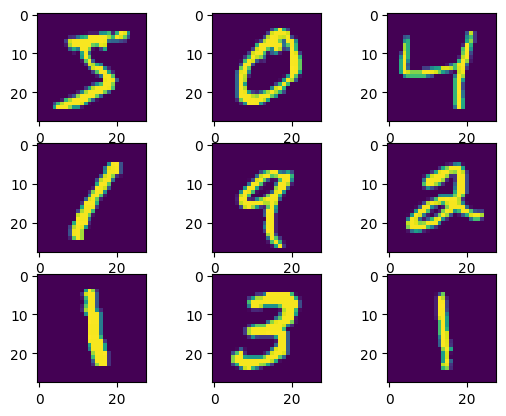

In [ ]:
# rappresenta i primi 9 numeri contenuti nel dataset per il training
for i in range(9):
  plt.subplot(3,3,i+1)
  # plt.imshow(X_train[i,:], cmap='gray', interpolation='none') per visualizzazione in scala di grigi
  plt.imshow(X_train[i,:])
plt.show()

### Normalizzazione
Una cosa che dobbiamo fare quando lavoriamo con le Reti Neurali Artificiali e normalizzare i valori degli input in un range da 0 a 1. I nostri pixel hanno colori che possono variare da 0 a 255, quindi, per scalare  i dati e renderli più semplici da gestire per la rete neurale li divideremo per 255.

Un ulteriore motivo per cui normalizziamo è legato al processo di Backpropagation, per cui i pesi dei nostri filtri cambiando, potrebbero causare ad ogni pixel dell'immagine un effetto di instabilità numerica e questo non permetterebbe alla rete di apprendere meglio

In [ ]:
# scalo i dati, dividendo per il massimo
X_train_scaled = X_train_reshaped/255
X_test_scaled = X_test_reshaped/255

### Dummy Variables
Non è nient'altro che una tabella che serve al classificatore, per "classificare" le immagine mostrando sull'asse delle x tutti i numeri possibili che un immagine può assumere e sull'asse delle y l'indice corrispondente all'immagine estratta. Questo è un qualcosa che la rete può comprendere ed elaborare non comprendendo i numeri delle immagini. Capiamo che le dummy variabiles mette in relazione le immagini con la loro label corrispondente. Il valore di ogni cella ci dirà con un True = 1 o un False = 0, la label corrispondente ad un immagine.

In [ ]:
# creo "dummy variables" , necessarie per creare un classificatore
y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)

y_train_dummies.head()

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True


In [ ]:
# converto dataframe in vettori (operazione non necessaria, ma è bene farlo per avere X e y nello stesso formato)
y_train_dummies = np.array(y_train_dummies)
y_test_dummies = np.array(y_test_dummies)

# Costruzione della rete neurale

# Convolutional Neural Network, Modello LeNet5
LeNet è una rete neurale costituita da 5 layers, 2 convolutional layers e 3 fully connected layers.
È caratterizzata da circa 60.000 parametri in totale. I layer sono disposti in questo modo:
- **1° layer**: layer di input e sarà un singolo neurone alla quale passeremo tutti i dati. I nostri dati rappresentano un tensore.
- **2° layer**: si tratta del primo layer convoluzionale
- **3° layer**: si tratta di un layer di pooling
- **4° layer**: si tratta di un layer convoluzionale
- **5° layer**: si tratta di un layer di pooling
- **6°7°8° layer**: sono i nostri 3 layer fully connected, dove l'8° è quello di output dove avremo solamente 10 neuroni

In [ ]:
X_train_tensor = X_train_scaled.reshape(60000,28,28,1)
X_test_tensor = X_test_scaled.reshape(10000,28,28,1)

### Librerie da importare
Dopo aver installato keras dovremo importare un po' di funzioni e librerie
- **keras.layer**: avremo bisogno dei layer citati precedentemente, più uno di flatten, due di dropout e quelli densi
- **keras.callbacks**: avremo bisogno di *EarlyStopping* e di *ModelCheckpoint* per evitare che la rete vada in overfitting durante il training
- **keras.models**: ci serviranno *Sequential* e *load_model* per caricare i nostri modelli migliori che abbiamo salvato

In [ ]:
from keras.layers import Dense, Conv2D,Flatten, AveragePooling2D, Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential, load_model

### Creazione del modello e dei vari layer (Approfondimento)
Quello che faremo è creare innanzitutto la nostra rete neurale con le varie funzioni di attivazione
#### Layer 1: Convolutional layer
**Convoluzione**<br>
Nel primo layer convoluzionale, quello che faremo è una convoluzione tra i pixel dell'immagine e 6 filtri che avranno un kernel 5x5. Il nome del layer convoluzionale, deriva proprio dall'operazione che faremo su tutta l'immagine. I filtri che verranno utilizzati sono filtri casuali (si possono usare pure i filtri creati da noi di edge detector come Sobel, Prewit,...) di dimensione 5x5. La matrice risultante di dalla convoluzione sarà una matrice che da 28x28x1 ce ne costruisce una 28x28x6 (questo perché con same la dimensione rimane invariata e aggiungiamo dei pixel di contorno uguali a 0 laddove il kernel finisce fuori dall'immagine). 

**Funzione di attivazione**<br>
La funzione di attivazione che utilizzeremo sarà una RELU. È necessario introdurre questa non-linearità all'interno della nostra rete neurale perché ci permette di modellare relazioni non lineari, rendendo la rete capace di modellare fenomeni complessi. Grazie alla non-linearità la rete può apprendere e rappresentare relazioni non lineari.

**Perchè la RELU?**<br>
La relu è una funzione che prende un valore in ingresso e se questo è negativo la mette a 0 e altrimenti restituisce il valore stesso.
Si tratta di una funzione di attivazione molto efficiente perché è in grado di ridurre il vanishing gradient ed è computazionalmente efficiente per modellare il nostro tipo di problema.

**Recap**
- Input: 28x28x1 
- Operazione: convoluzione con 6 filtri 5x5 
- Output: 28x28x6


#### Layer 2: AveragePooling2D
Il secondo layer, si tratta di un layer di pooling che ha lo scopo di dimezzare la dimensione dell'immagine. Perciò prende una patch 2x2 dell'immagine e memorizza il valore dei 4 pixel, scegliendo il valore medio tra i 4. Questa operazione viene effettuato su tutta l'immagine senza effettuare sovrapposizioni. Quindi avremo un "passo" di 2 pixel orizzontalmente e verticalmente.

- Input: 28x28x6 
- Operazione: Average Pooling con pool 2x2
- Output: 14x14x6

#### Layer 3: Convolutional Layer:
Nel nostro terzo layer, applicheremo le stesse operazioni del primo layer, ma differentemente dal primo layer le dimensioni delle immagini risultanti non sarà lo stesso. Infatti ora laddove il kernel fuoriesce dall'immagine abbiamo una perdita di informazione. Perderemo lungo l'asse orizzontale e verticale un numero di pixel pari alla dimensione del raggio del kernel. In questo caso noi utilizzeremo di nuovo un kernel con dimensione 5x5, ma diversamente da prima, applicheremo 16 filtri.

- Input: 14x14x1
- Operazione: Convoluzione con 16 filtri 5x5
- Output: 10x10x16

#### Layer 4: AveragePooling2D
Il quarto layer di pooling non fa altro che dimezzare di nuovo la dimensione dell'immagine, creando un'immagine risultante di dimensione 5x5 esattamente come al secondo layer, scegliendo il valore medio tra i 4 pixel.

- Input: 10x10x16
- Operazione: Average Pooling con pool 2x2
- Output: 5x5x16

#### Layer 5: Flatten
Il layer di flatten si tratta di un layer che ha il compito di trasformare le immagini bidimensionali in immagini monodimensionali, quindi inserendo tutti i pixel in un vettore. Otterremo così un vettore di 400 pixel. Questo è necessario perché successivamente i nostri dati verranno passati ad una rete fully connected che si occupano quindi di effettuare la classificazione finale.

- Input: 5x5x16
- Operazione: Trasformazione di un tensore multidimensionale in un vettore monodimensionale
- Output: 400

#### Layer 6: Dense Layer 120 neuroni (relu)
Il primo layer denso nel famoso modello LeNet-5 avrà 120 neuroni, alla quale passeremo le nostre 400 immagini. Ogni neurone di questo layer è connesso a tutti i neuroni del layer successivo. Questo fa si che un neurone del layer successivo riceva le informazioni da più neuroni in contemporanea. L'informazione quindi viene sempre ricostruita.
Il primo dense layer mi serve per fare l'estrazione delle feature delle mie immagini.
La sua funzione di attivazione sarà una RELU
Avremo che ogni neurone riceverà 400 immagini, quindi avremo in totale 48.000 parametri totali + 120 bias

#### Layer 7: Dense layer 84 neuroni (relu)
Il secondo layer denso nel modello LeNet-5 avrà 84 neuroni alla quale passeremo i nostri parametri. avremo quindi in totale 120 parametri in ingresso ad un solo neurone. Quindi, 120x84 = 10.080 + 84 bias = 10.164 parametri totali. In questo layer la funzione di attivazione per i nostri neuroni sarà sempre una RELU, e ogni neurone sarà connesso a tutti i neuroni del layer successivo

#### Layer 8: Dense layer 10 neuroni (soft max)
L'ultimo layer sarà il nostro layer di output con un totale di 10 neuroni, ognuna che rappresenta ciascuna classe, ovvero le cifre da 0 a 9. Sarà il layer che si occupa di fare la classificazione finale, dove la funzione di attivazione finale che verrà utilizzata sarà la *soft max*, che trasforma i valori grezzi prodotti dai 10 neuroni in probabilità la cui somma di tutte le classi fa 1.
Ogni neurone dal livello precedente riceverà 84 input, quindi avremo in totale 840 parametri totali + 10 bias = 850 

#### Backpropagation ed earlystopping
Al termine della costruzione della rete convoluzionale neurale possiamo, è doveroso adottare due approcci per permettere alla rete di apprendere in caso di errore, correggendo i pesi e per evitare che durante il training la rete si adatti troppo ai dati di input andando in overfitting, ovvero, specializzandosi troppo solamente nei casi dei dati di training.
Per la prima opzione utilizzeremo l'ottimizzatore 'Adam' (Adaptive Moment Estimation) che è un algoritmo in grado di adattare i pesi della rete neurale in modo dinamico, trovando valori ottimali dei pesi (W) e del bias (b). Si tratta di un algoritmo che si basa sul **gradiente discendente** e aggiorna i parametri della funzione di perdita rispetto a quei parametri.<br><br>
L'early stopping invece si tratta di una tecnica che viene utilizzata nell'addestramento delle reti (quindi in fase di training) e consiste nell'interrompere l'addestramento quando i valori della validation accuracy (ovvero quante immagini classifica correttamente la rete), dopo un certo numero di epoche consecutive non riesce più a migliorare. Successivamente, grazie ai dati di validation loss e validation accuracy scelgo il modello che in una data epoca ha ottenuto risultati migliori e la salvo. Questa tecnica serve per prevenire il fenomeno di overfitting. 

In [ ]:
# creazione del modello sequenziale
model = Sequential()

# 1° convolutional layer
# la dimensione dello scanner è 5x5. Con padding='same' la dimensione dell'immagine rimane invariata
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
# con average pooling 2D l'immagine viene ridotta da 28x28 a 14x14
#model.add(AveragePooling2D())
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

# 2° convolutional layers
# la dimensione dello scanner è 5x5. Con padding='valid' e lo scanner 5x5 l'immagine viene ridotta da 14x14 a 10x10
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
# con average pooling 2D l'immagine viene ridotta da 10x10 a 5x5
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

# la rete passa da 2D ad 1D
model.add(Flatten())

# 3° layer
model.add(Dense(units=120, activation='relu'))

# 4° layer
model.add(Dense(units=84, activation='relu'))

# 5 layer (output)
model.add(Dense(units=10, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# monitors

# interrompe il training se non c'è un miglioramento nella validation accuracy dopo un certo numero di epoche
early_stopping_monitor = EarlyStopping(patience=10,monitor='val_accuracy')

# salve il miglior modello (basato sulla validation accuracy)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.keras',
                                            save_weights_only=False,
                                            monitor='val_accuracy',
                                            mode='auto',
                                            save_best_only=True,
                                            verbose=1)

print(model.summary())

# salviamo la storia del training
history = model.fit(X_train_tensor,y_train_dummies,
          validation_data=(X_test_tensor,y_test_dummies),
          batch_size=128,
          epochs=100,
          callbacks=[early_stopping_monitor,model_checkpoint_callback])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_8             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_9             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7528 - loss: 0.8018
Epoch 1: val_accuracy improved from -inf to 0.95700, saving model to best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7542 - loss: 0.7975 - val_accuracy: 0.9570 - val_loss: 0.1483
Epoch 2/100
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9614 - loss: 0.1271
Epoch 2: val_accuracy improved from 0.95700 to 0.97710, saving model to best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9614 - loss: 0.1270 - val_accuracy: 0.9771 - val_loss: 0.0722
Epoch 3/100
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9770 - loss: 0.0761
Epoch 3: val_accuracy improved from 0.97710 to 0.98090, saving model to best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9770 - loss: 0.0761 - val_accuracy: 0.9809 - val_loss: 0.0588
Epoch 4/100
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9823 - loss: 0.0574
Epoch 4: val_accuracy improved f

ora quello che faremo è ricaricare il modello migliore che precedentemente avevamo salvato e testarlo di nuovo sul dataset delle mie immagini di test. Ricordiamoci che quello che passerò alla rete sarà il mio tensore di immagini.<br>
Il procedimeno successivo sarà quello di calcolare l'accuratezza, confrontando i valori predetti della rete con quelli corretti.

In [ ]:
# carico il modello migliore
best_model = load_model('best_model.keras')

# previsioni del modello, utilizzando il "test dataset"
y_pred = np.argmax(best_model.predict(X_test_tensor),axis=1)

# calcolo dell'accuratezza
acc = np.mean(y_pred == y_test)
print('accuratezza del modello',acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
accuratezza del modello 0.9914


### Predizioni errate
La rete ha avuto un'accuratezza del 0,991 circa, questo indica che la nostra rete ha sbagliato su 10.000 predizioni, all'incirca 90. Di questi errori commessi vanno però considerati i numeri scritti in maniera confusa e difficilmente identificabili e quelli che erano facilmente confondibili con altri.

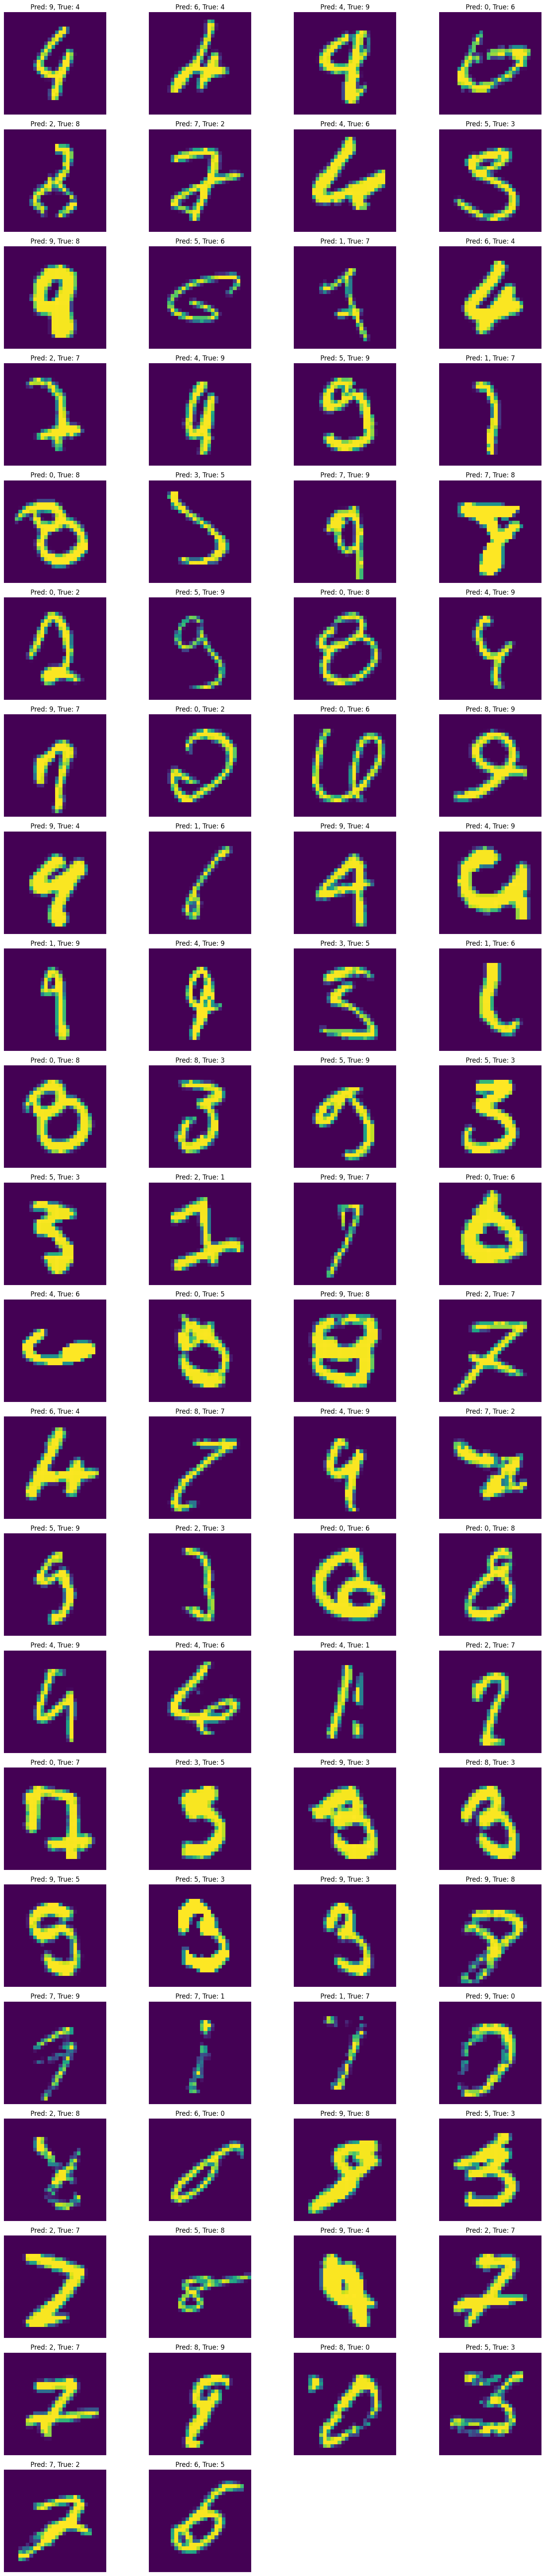

In [ ]:
import matplotlib.pyplot as plt
import math

# Identifica gli indici delle predizioni errate
wrong_predictions = np.where(y_pred != y_test)[0]

# Numero di immagini da mostrare
num_images = len(wrong_predictions)  # Mostra tutte le immagini sbagliate
images_per_row = 4  # Numero di immagini per riga

# Calcola il numero di righe necessarie
num_rows = math.ceil(num_images / images_per_row)

plt.figure(figsize=(15, num_rows * 3))
for i, idx in enumerate(wrong_predictions[:num_images]):
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(X_test_tensor[idx].squeeze())
    plt.title(f"Pred: {y_pred[idx]}, True: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### Confusion Matrix
Quello che notiamo dalle immagini sopra è che la rete tende a confondere spesso alcuni numeri, tra cui il 4 e il 9. Questo è dovuto alle feature estratte che forniscono una rappresentazione del numero difficilmente distinguibili dalle altre.<br>
Questa visione può essere estesa e migliorata con una confusion matrix, che si tratta di una matrice che mette in relazione i numeri predetti dalla rete. La diagonale della matrice indicherà i numeri che la matrice ha identificato correttamente.

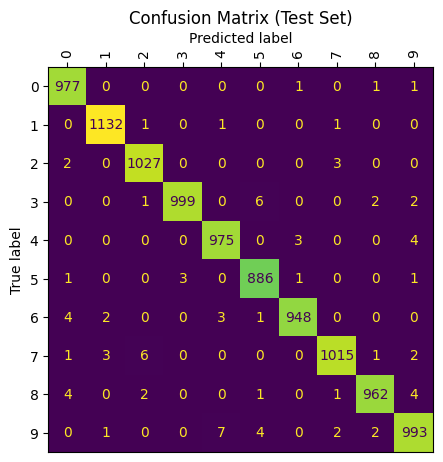

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcola la confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizza la confusion matrix con le etichette sopra
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis', ax=ax, colorbar=False)

# Modifica le etichette dell'asse X per essere sopra la matrice
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.xticks(rotation=90)  # Ruota le etichette per leggibilità

plt.title('Confusion Matrix (Test Set)')
plt.show()


### Grafico accuracy dei dati di training e dei dati di testing
Il grafico mostra come la rete sta apprendendo durante ogni epoca di training. Quello che possiamo notrare è che non siamo in presenza di overfitting, grazie all'early stopping. La rete ottiene un ottimo score nei dati di training, questo vuol dire che aumentando sempre di più le epoche la rete apprende dalle immagini di test in maniera migliore. I dati di testing invece oscillano anche quelli su un valore ottimale, leggermente inferiore ai nostri dati testing, questo significa che la rete è robusta e si comporta bene in quasi tutte le situazioni presenti, anche con numeri mai visti prima ad ora

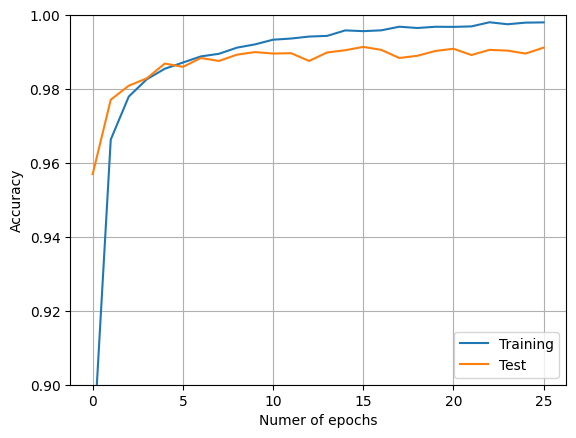

In [ ]:
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Test')
plt.legend()
plt.xlabel('Numer of epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.ylim(0.9,1)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[ 977,    0,    0,    0,    0,    0,    1,    0,    1,    1],
       [   0, 1132,    1,    0,    1,    0,    0,    1,    0,    0],
       [   2,    0, 1027,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0,    1,  999,    0,    6,    0,    0,    2,    2],
       [   0,    0,    0,    0,  975,    0,    3,    0,    0,    4],
       [   1,    0,    0,    3,    0,  886,    1,    0,    0,    1],
       [   4,    2,    0,    0,    3,    1,  948,    0,    0,    0],
       [   1,    3,    6,    0,    0,    0,    0, 1015,    1,    2],
       [   4,    0,    2,    0,    0,    1,    0,    1,  962,    4],
       [   0,    1,    0,    0,    7,    4,    0,    2,    2,  993]])

# Modello Big Lenet5
Aumentiamo il numero di nodi, moltiplicando x4 i nodi in ogni layer. Infine introduciamo nuovamente il dropout per prevenire l'overfitting

## Architettura del modello
Il modello Big Lenet5 differisce leggermente dal modello LeNet5. Abbiamo sempre 2 layer convoluzionali e 2 layer di pooling, ma dopo il layer di flatten che ci riduce le dimensioni delle immagini da 2D ad 1D abbiamo tra i 3 layer densi, due layer di **dropout** che ci servono per evitare l'overfitting.<br>
Mentre, per quanto riguarda il numero di neuroni e il numero di filtri che vengono applicati nei primi layer abbiamo:<br>

### Layer 1: Convolutional layer
Nel primo layer convoluzionale la funzione di attivazione è sempre la relu e le immagini in ingresso sono sempre di dimensione 28x28x1. Però ad differenza del LeNet5 abbiamo un aumento dei filtri da 6 a 24, mentre la dimensione dei filtri rimane 5x5
- Input: 28x28x1
- Operazione: Convoluzione con 16 filtri 5x5
- Output: 28x28x24

### Layer 2: AveragePooling2D 
Il secondo layer rimane identico a quello del LeNet5
- Input: 28x28x24
- Operazione: Average pooling con pool 2x2
- Output: 14x14x24

### Layer 3: Convolutional layer
Nel terzo layer abbiamo ancora come funzione di attivazione la relu, ma le immagini in ingresso hanno dimensione 14x14, ma applicheremo diversamente dal LeNet5 64 filtri invece di 16 di dimensione 5x5. Questa volta con l'operazione di convoluzione, l'immagine risultante perderà i bordi, quindi il nostro risultato sarà di dimensione 10x10
- Input: 14x14x24
- Operazione: Convoluzione con 64 filtri 5x5
- Output: 10x10x64

### Layer 4: AveragePooling2D 
Il quarto layer rimane identico a quello del LeNet5
- Input: 10x10x64
- Operazione: Average pooling con pool 2x2
- Output: 5x5x64

### Layer 5: Flatten
Il layer flatten rimane invariato a quello del LeNet5
- Input: 5x5x64
- Operazione: Trasformazione di un tensore multidimensionale in un vettore unidimensionale
- Output: 1600

### Layer 6: Dense Layer 480 neuroni (relu)
Le prime sostanziali differenze le notiamo nel primo layer denso, dove da 120 neuroni del LeNet5 passiamo ai 480 neuroni del Big LeNet-5.<br>
Questa grande differenza permette alla rete di estrarre maggiori feature e maggiori dettagli dalle immagini. Inoltre, combina le feature estratte in maniera più precisa.<br>
**N.B:** *Aumentare il numero di neuroni in una rete non porta sempre a vantaggi, infatti, si rischia che la rete perda la capacità di generalizzare, per questo motivo dobbiamo ricorrere al dropout.

### Layer 7: Dropout Layer
Il primo layer di dropout non fa altro che ridurre o "spegnere" un numero arbitrario di neuroni ad ogni iterazione, per permettere alla rete di generalizzare solamente utilizzando i neuroni disponibili. Questa tecnica permette di ridurre l'overfitting e permette alla rete di generalizzare meglio su dati mai visti fino ad ora. Questo per certi versi forza la rete a non affidarsi troppo a neuroni specifici e la rete è costretta a trovare modi alternativi per rappresentare i dati<br>
Nel nostro caso abbiamo spento il 50% dei neuroni, ovvero, su 480, per ogni iterazione ne usiamo solamente 240.

### Layer 8: Dense Layer 336 Neuroni (relu)
In questo layer ora ci ritroviamo con 336 neuroni contro gli 84 del LeNet-5, quindi in entrambi i casi abbiamo quadruplicato il numero di neuroni. 

### Layer 9: Dropout layer
Il dropout spegne circa il 50% dei neuroni esattamente come accadeva nel layer precedente

### Layer 10: Dense layer 10 neuroni (softmax)
Esattamente come nel LeNet avremo 10 neuroni in output di cui ognuno rappresenta ciascuna classe, quindi le cifre da 0 a 9. In output, avremo la probabilità che l'immagine rappresenti un numero di una certa classe grazie alla funzione di attivazione softmax.

### Backpropagation ed earlystopping
Esattamente come nel LeNet-5 useremo come funzione di ottimizzazione adam, che andrà ad aggiornare i pesi in modo adattivo, ovvero, calcolando i gradienti di perdita rispetto ai pesi della rete. <br>
Mentre per evitare che la rete vada in overfitting durante il training, applicheremo l'early stopping, che interromperà il training qualora l'accuracy non migliorasse dopo 10 epoche


In [ ]:
# creazione del modello sequenziale
model = Sequential()

# 1° convolutional layer
# la dimensione dello scanner è 5x5. Con padding='same' la dimensione dell'immagine rimane invariata
model.add(Conv2D(filters=24, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
# con average pooling 2D l'immagine viene ridotta da 28x28 a 14x14
#model.add(AveragePooling2D())
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

# 2° convolutional layers
# la dimensione dello scanner è 5x5. Con padding='valid' e lo scanner 5x5 l'immagine viene ridotta da 14x14 a 10x10
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='valid', activation='relu'))
# con average pooling 2D l'immagine viene ridotta da 10x10 a 5x5
#model.add(AveragePooling2D())
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

# la rete passa da 2D ad 1D
model.add(Flatten())

# 3° layer
model.add(Dense(units=480, activation='relu'))
model.add(Dropout(0.5))

# 4° layer
model.add(Dense(units=336, activation='relu'))
model.add(Dropout(0.5))

# 5 layer (output)
model.add(Dense(units=10, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# monitors

# interrompe il training se non c'è un miglioramento nella validation accuracy dopo un certo numero di epoche
early_stopping_monitor = EarlyStopping(patience=10,monitor='val_accuracy')

# salve il miglior modello (basato sulla validation accuracy)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.keras',
                                            save_weights_only=False,
                                            monitor='val_accuracy',
                                            mode='auto',
                                            save_best_only=True,
                                            verbose=1)

print(model.summary())

# salviamo la storia del training
history = model.fit(X_train_tensor,y_train_dummies,
          validation_data=(X_test_tensor,y_test_dummies),
          batch_size=128,
          epochs=100,
          callbacks=[early_stopping_monitor,model_checkpoint_callback])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 24)     │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_10            │ (None, 14, 14, 24)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 64)     │        38,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 480)            │       768,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 336)            │       161,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 336)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         3,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 972,554 (3.71 MB)

 Trainable params: 972,554 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8023 - loss: 0.6019
Epoch 1: val_accuracy improved from -inf to 0.98370, saving model to best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8026 - loss: 0.6012 - val_accuracy: 0.9837 - val_loss: 0.0516
Epoch 2/100
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9758 - loss: 0.0824
Epoch 2: val_accuracy improved from 0.98370 to 0.98860, saving model to best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9758 - loss: 0.0823 - val_accuracy: 0.9886 - val_loss: 0.0360
Epoch 3/100
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9831 - loss: 0.0581
Epoch 3: val_accuracy improved from 0.98860 to 0.99050, saving model to best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9831 - loss: 0.0581 - val_accuracy: 0.9905 - val_loss: 0.0284
Epoch 4/100
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9856 - loss: 0.0465
Epoch 4: val_accuracy imp

Quello che notiamo è che il modello Big LeNet5 raggiunge un livello di accuratezza che si aggirà attorno allo 0,994, ovvero, circa il 0,004% di miglioramento rispetto al modello LeNet5. Abbiamo avuto un miglioramento non estremamente significativo, ma che esegue una classificazione migliore laddove la rete sbagliava.<br>
Questo lo si può vedere perfettamente dalla confusion matrix, dove ora la rete tende a non confondere il numero 7 con il 2 ad esempio

In [ ]:
# carico il modello migliore
best_model = load_model('best_model.keras')

# previsioni del modello, utilizzando il "test dataset"
y_pred_prob = best_model.predict(X_test_tensor)
y_pred = np.argmax(y_pred_prob,axis=1)

# calcolo dell'accuratezza
acc = np.mean(y_pred == y_test)
print('accuratezza del modello',acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
accuratezza del modello 0.9941


### Grafico Accuracy dei dati di training e dei dati di testing

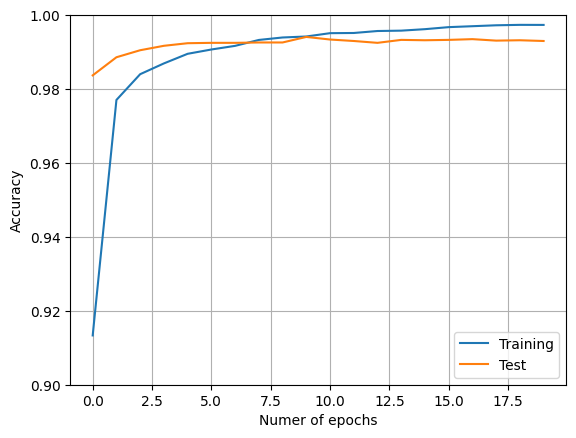

In [ ]:
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Test')
plt.legend()
plt.xlabel('Numer of epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.ylim(0.9,1)
plt.show()

### Predizioni

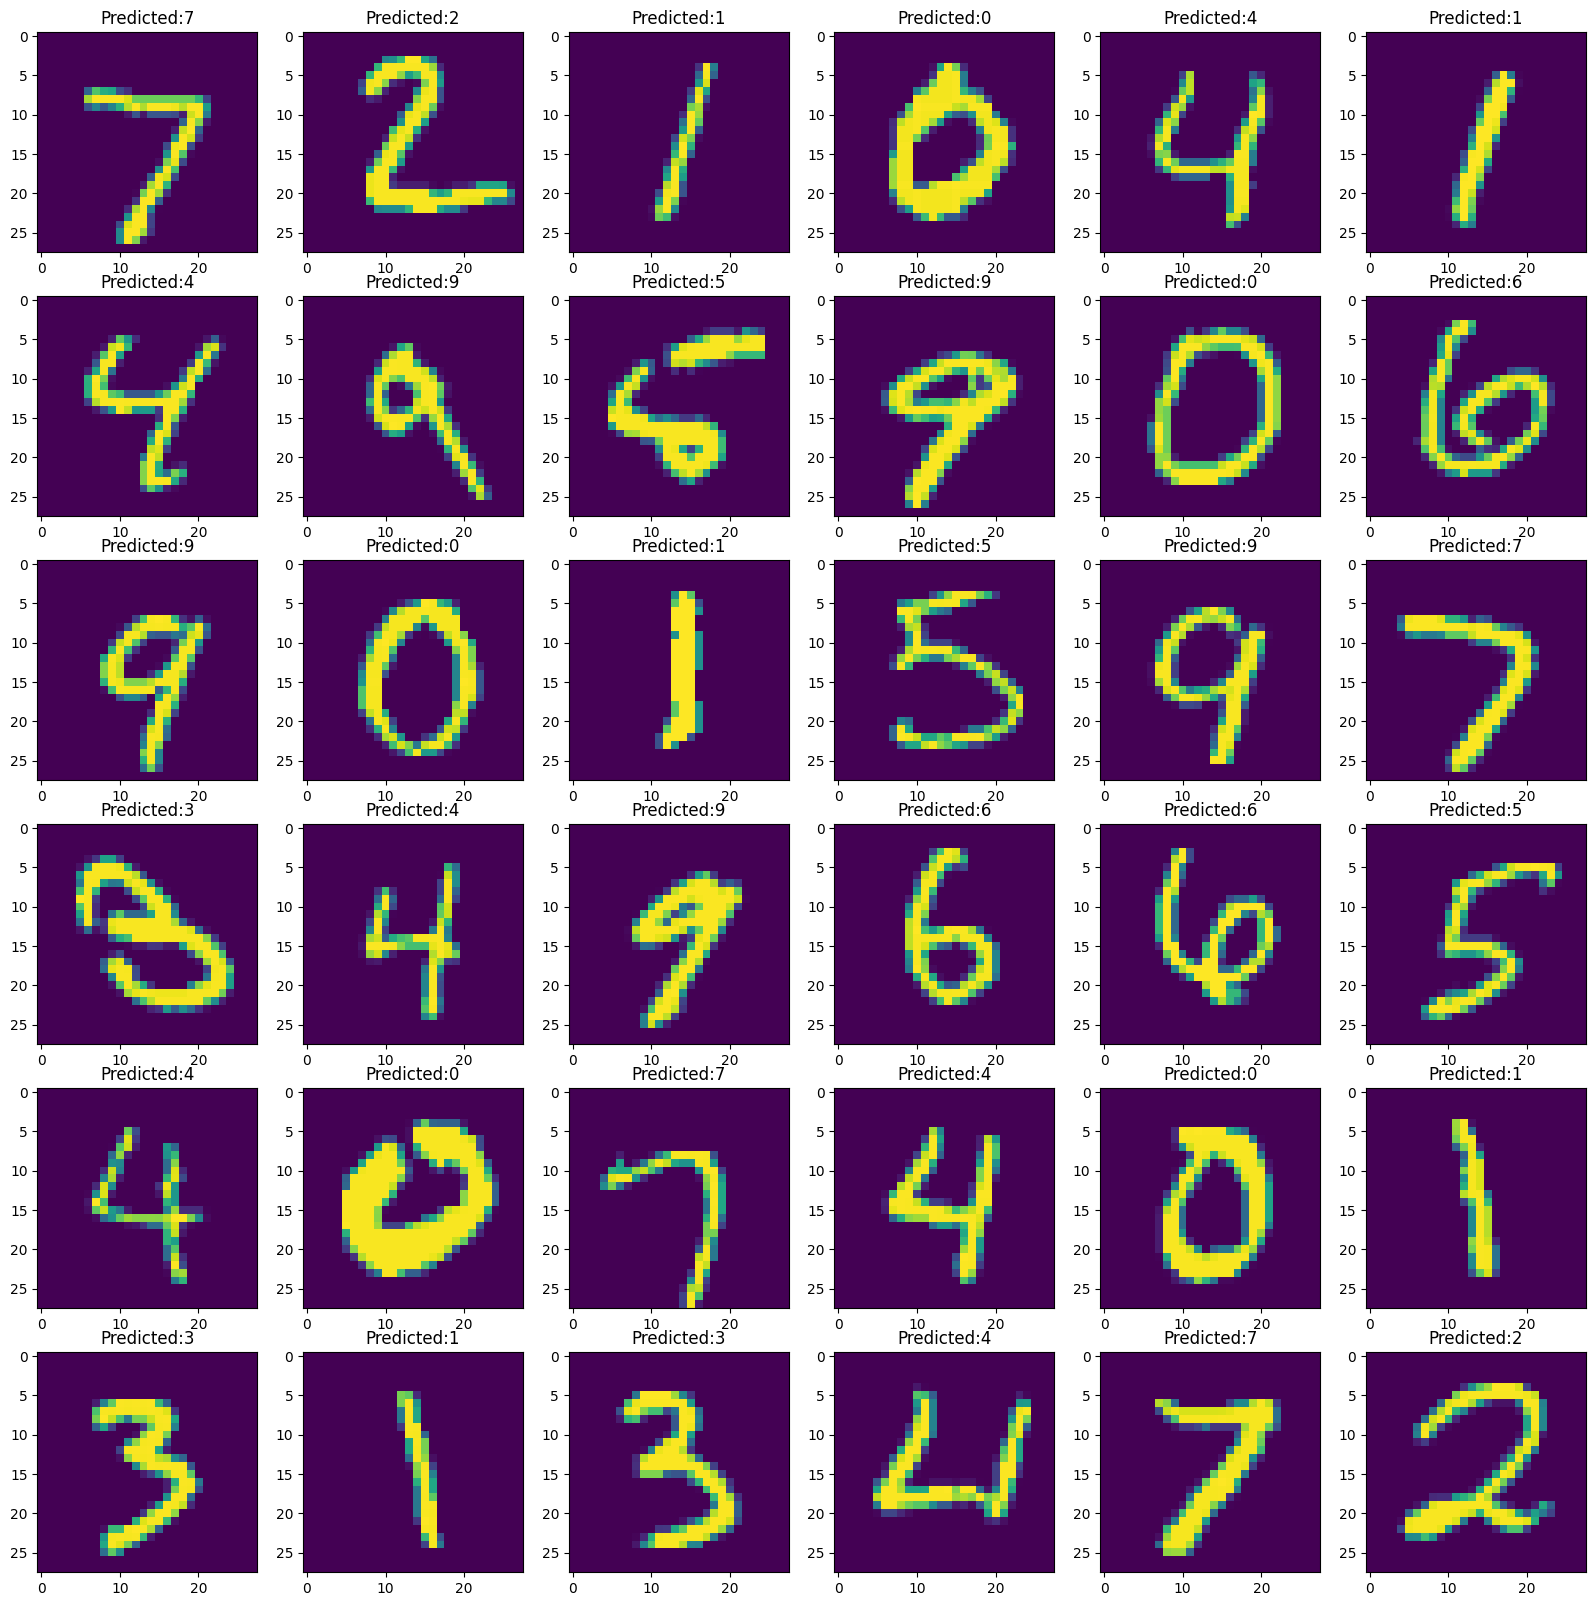

In [ ]:
plt.figure(figsize=(20,20))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(X_test[i,:])
  plt.title('Predicted:' +str(y_pred[i]))
plt.show()

### Confusion Matrix

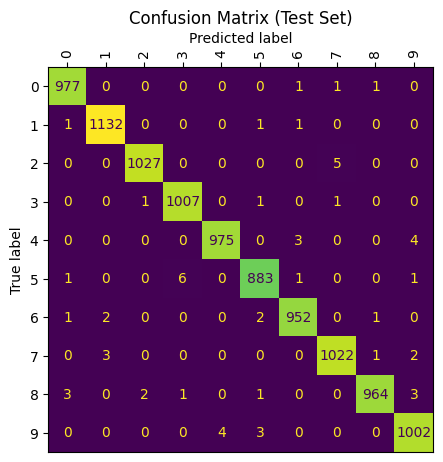

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcola la confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizza la confusion matrix con le etichette sopra
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis', ax=ax, colorbar=False)

# Modifica le etichette dell'asse X per essere sopra la matrice
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.xticks(rotation=90)  # Ruota le etichette per leggibilità

plt.title('Confusion Matrix (Test Set)')
plt.show()
